     account_holder account_number operation type       operation_time  \
0       Иванов Иван       ACC-1000        deposit  2025-01-10 10:55:55   
1       Иванов Иван       ACC-1000       withdraw  2025-02-12 10:55:55   
2       Иванов Иван       ACC-1000        deposit  2025-03-10 10:55:55   
3       Иванов Иван       ACC-1000       withdraw  2025-05-12 10:55:55   
4   Сидоров Николай       ACC-1000        deposit  2025-01-01 10:55:55   
5   Сидоров Николай       ACC-1000       withdraw  2025-02-20 10:55:55   
6   Сидоров Николай       ACC-1000        deposit  2025-03-25 10:55:55   
7   Сидоров Николай       ACC-1000       withdraw  2025-06-12 10:55:55   
8   Сидоров Николай       ACC-1000        deposit  2025-01-01 10:55:55   
9   Сидоров Николай       ACC-1000       withdraw  2025-04-10 10:55:55   
10  Сидоров Николай       ACC-1000        deposit  2025-03-25 10:55:55   
11  Сидоров Николай       ACC-1000       withdraw  2025-07-12 10:55:55   
12      Иванов Иван       ACC-1000    

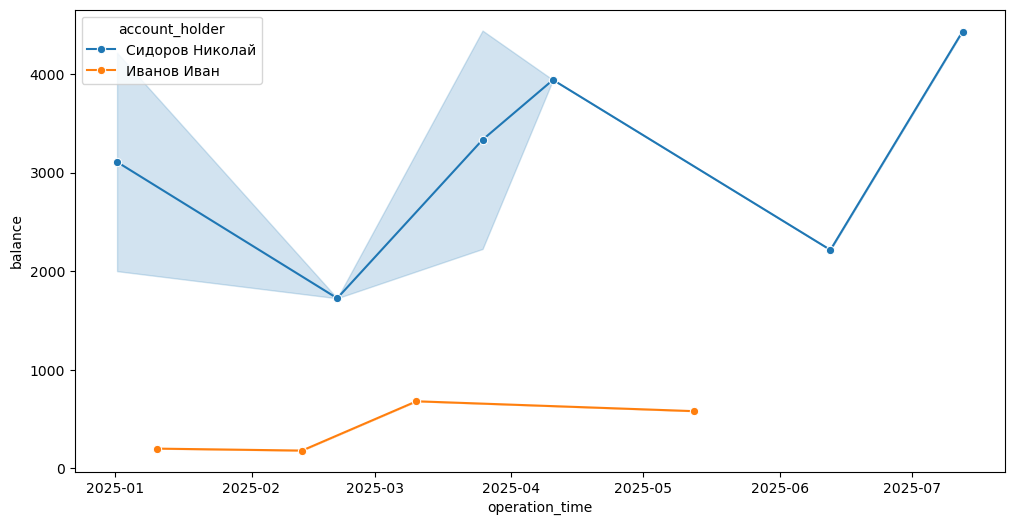

In [2]:
import datetime
from pprint import pprint
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

class History_manager:
    all_history =[]
    @classmethod
    def register_acc(cls,account):
        cls.all_history.append(account)

    @classmethod
    def plot_history(cls):
        all_operations = []
        for account in cls.all_history:
            all_operations.extend(account.get_history())

        return pd.DataFrame(all_operations,
                            columns=['account_holder','account_number', 'operation type', 'operation_time',
                                     'amount', 'balance', 'operation status'])


    @classmethod
    def all_history_mang(cls):
        return cls.all_history
class Account:
    _account_counter = 1000
    operations_history = []

    def __init__(self, account_holder: str, balance: float = 0):
        pattern = r"^[А-ЯЁ][а-яё]+(?:\s[А-ЯЁ][а-яё]+)?$"
        if bool(re.fullmatch(pattern, account_holder)) is False:
            raise ValueError("Не корректное имя")
        self.account_holder = account_holder
        if balance < 0:
            raise ValueError("Ошибка: отрицательный баланс")
        self.__balance = balance
        self.account_number = f"ACC-{self._account_counter}"
        History_manager.register_acc(self)

    def deposit (self, amount,  t):
        #self.t=t
        if amount <= 0:
            self.operations_history.append(
                    {
                    'account_holder': self.account_holder,
                    'account_number': f"ACC-{self._account_counter}",
                    'operation type': "deposit",
                    'operation_time': t,  #datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                    'amount': amount,
                    'balance': self.__balance,
                    'operation status': "False"
                }
            )
            raise ValueError("Ошибка: отрицательное пополнение")

        self.__balance+=amount
        self.operations_history.append(
             {
                'account_holder': self.account_holder,
                'account_number': f"ACC-{self._account_counter}",
                'operation type': "deposit",
                'operation_time': t,  #datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                'amount': amount,
                'balance': self.__balance,
                'operation status':"success"
            }
            )


    def withdraw (self, amount,  t):
        #self.t=t
        if amount <= 0:
            self.operations_history.append(
                    {
                    'account_holder': self.account_holder,
                    'account_number': f"ACC-{self._account_counter}",
                    'operation type': "withdraw",
                    'operation_time': t,  #datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                    'amount': amount,
                    'balance': self.__balance,
                    'operation status': "False"
                }
            )
            raise ValueError("Ошибка: отрицательное пополнение")

        self.__balance-=amount
        self.operations_history.append(
             {
                'account_holder': self.account_holder,
                'account_number': f"ACC-{self._account_counter}",
                'operation type': "withdraw",
                'operation_time': t,  #datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                'amount': amount,
                'balance': self.__balance,
                'operation status':"success"
            }
            )

    def get_balance(self):
        return self.__balance

    def get_history(self):
        return self.operations_history

    def analyse(self,n):
        a=self.operations_history[-n:]
        return a

class Cheking_account(Account):
    account_type="Cheking_account"

class Saving_account(Account):
    account_type="Saving_account"
    remains=0

    def withdraw (self, amount,  t):
        #self.t=t
        if amount <= 0 or amount>self.__balance/2:
            self.operations_history.append(
                    {
                    'account_holder': self.account_holder,
                    'account_number': f"ACC-{self._account_counter}",
                    'operation type': "withdraw",
                    'operation_time': t,  #datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                    'amount': amount,
                    'balance': self.__balance,
                    'operation status': "fail"
                }
            )
        raise ValueError("Ошибка: отрицательное пополнение")


        self.__balance-=amount
        self.operations_history.append(
             {
                'account_holder': self.account_holder,
                'account_number': f"ACC-{self._account_counter}",
                'operation type': "withdraw",
                'operation_time': t,  #datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                'amount': amount,
                'balance': self.__balance,
                'operation status':"success"
            }
            )

    def apply_interest(self, rate):
        return self.__balance * rate


acc1=Account("Иванов Иван")
acc1.deposit(amount=200,t='2025-01-10 10:55:55')
acc1.withdraw(amount=20,t='2025-02-12 10:55:55')
acc1.deposit(amount=500,t='2025-03-10 10:55:55')
acc1.withdraw(amount=100,t='2025-05-12 10:55:55')

#print(acc1.get_balance())
#pprint(acc1.get_history())

acc2=Account("Сидоров Николай")
acc2.deposit(amount=2000,t='2025-01-01 10:55:55')
acc2.withdraw(amount=275,t='2025-02-20 10:55:55')
acc2.deposit(amount=500,t='2025-03-25 10:55:55')
acc2.withdraw(amount=10,t='2025-06-12 10:55:55')
acc2.deposit(amount=2000,t='2025-01-01 10:55:55')
acc2.withdraw(amount=275,t='2025-04-10 10:55:55')
acc2.deposit(amount=500,t='2025-03-25 10:55:55')
acc2.withdraw(amount=10,t='2025-07-12 10:55:55')
#print(acc2.get_balance())
#pprint(acc2.get_history())
pprint(History_manager.all_history_mang())

df=History_manager.plot_history()
print(df)

df['operation_time'] = pd.to_datetime(df['operation_time'])
df = df.sort_values(['operation_time','account_holder'])

# # Строим линейный график
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='operation_time', y='balance', hue='account_holder',marker='o')
plt.show()


# попытка использования try но в данной задаче не актуально
# while flag == True:
#     try:
#         #name = input()
#         acc1 = Account("Иванов Иван")
#         acc1.deposit(100)
#         acc1.withdraw(50)
#         acc1.deposit(100)
#         acc1.withdraw(50)
#         acc1.deposit(1000)
#         acc1.withdraw(50)
#         acc1.deposit(1000)
#         acc1.withdraw(545)
#         acc1.deposit(1000)
#         acc1.deposit(1000)
#         #pprint(acc1.operations_history)
#         pprint(acc1.analyse(4))
#
#         flag = False
#     except:
#         print("Завершилось неудачно, введите корректное значение")

